<a href="https://colab.research.google.com/github/ghassenbensamir/Selenium/blob/main/signature_Vfinale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


image = cv2.imread('test1.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# blur
blur = cv2.GaussianBlur(gray, (0,0), sigmaX=33, sigmaY=33)

# divide
divide = cv2.divide(gray, blur, scale=255)

# otsu threshold
thresh = cv2.threshold(divide, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

cv2_imshow( gray)
cv2_imshow( divide)
cv2_imshow( thresh)
cv2_imshow( morph)

# cv2.imwrite("thresholdimg.jpg", thresh)
equ = cv2.equalizeHist(thresh)
res = np.hstack((thresh, equ))
cv2_imshow(res)

cv2.imwrite("res1.jpg", morph)





In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


# Load image and HSV color threshold
image = cv2.imread("image.jpg")



hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)



lower = np.array([90, 38, 0])
upper = np.array([145, 255, 255])
mask = cv2.inRange(hsv, lower, upper)
result = cv2.bitwise_and(image, image, mask=mask)
result[mask==0] = (255, 255, 255)

# Find contours on extracted mask, combine boxes, and extract ROI
cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
if cnts:
  cnts = np.concatenate(cnts)
  x,y,w,h = cv2.boundingRect(cnts)
  cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
  ROI = result[y:y+h, x:x+w]
cv2_imshow(hsv)

cv2_imshow(result)
cv2_imshow(mask)
cv2_imshow(image)
cv2_imshow(ROI)
cv2.waitKey()


Final Code


In [70]:
LOWER_BOUND = np.array([90, 38, 0])
UPPER_BOUND = np.array([145, 255, 255])

def process_image(image_path):

    try:
        # Load image
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError("Error: Unable to load image")


    # Convert image to HSV color space
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Apply HSV color threshold
        mask = cv2.inRange(hsv, LOWER_BOUND, UPPER_BOUND)

    # Bitwise AND operation to extract region of interest
        result = cv2.bitwise_and(image, image, mask=mask)
        result[mask == 0] = (255, 255, 255)

        return hsv, result, mask, image

    except Exception as e:
        print("An error occurred:", str(e))
        return None


In [73]:
def find_contours(processed_data):
  try:
    hsv, result, mask, image = processed_data

    # Find contours on the mask
    cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    if cnts:
        cnts = np.concatenate(cnts)
        x, y, w, h = cv2.boundingRect(cnts)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 2)
        ROI = result[y:y+h, x:x+w]
    else:
        ROI = None

    return image, ROI

  except Exception as e:
        print("An error occurred:", str(e))
        return None

In [62]:
def display_images(images):
    for name, img in images.items():
        cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

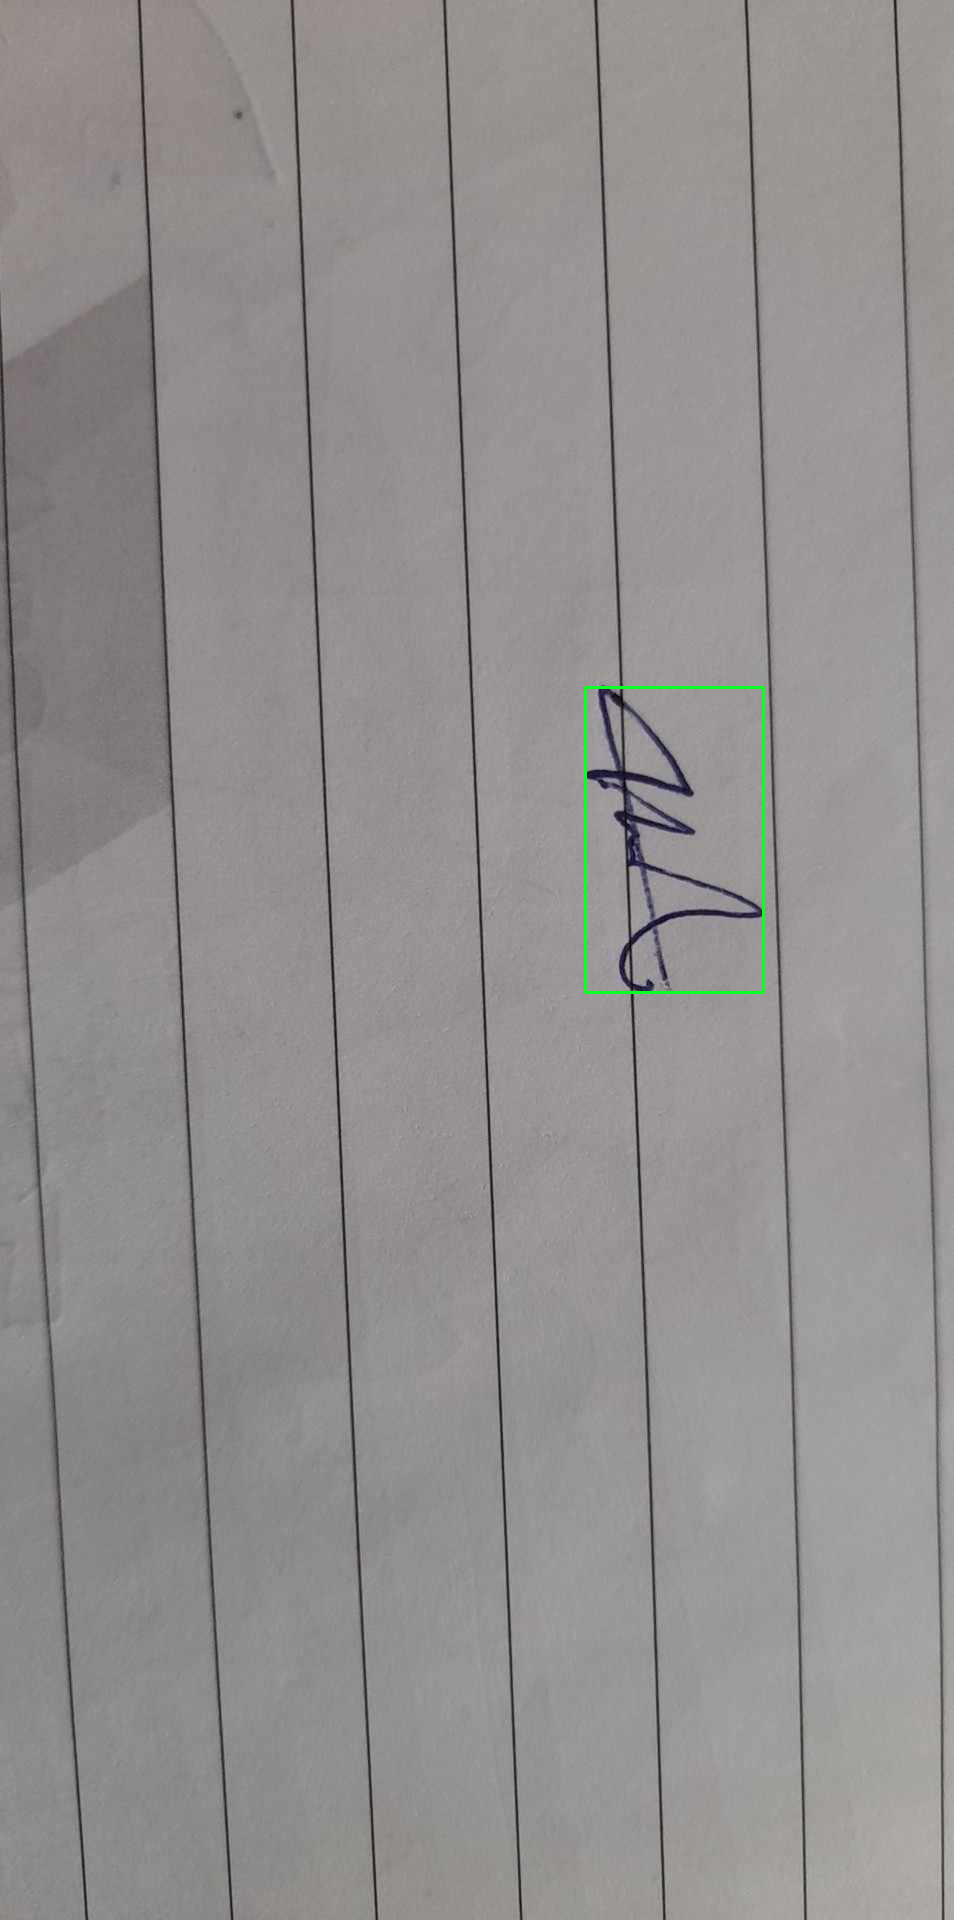

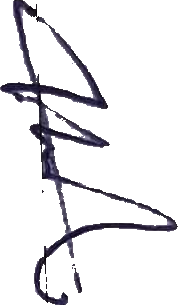

In [74]:
def main():
  try:
    image_path = "image.jpg"
    processed_data = process_image(image_path)
    if processed_data:
        image, _ = find_contours(processed_data)
        images = {"Image": image,"ROI":ROI}
        display_images(images)
  except Exception as e:
        print("An error occurred:", str(e))

if __name__ == "__main__":
    main()